<a href="https://colab.research.google.com/github/bartteeuwen/USD-Data-Science-Programming-Class/blob/main/Data_Science_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Programming (ADS-500B-01)
## Final Project
ADS-500B Group 4

**Team Members: **Bart Teeuwen, Michell Wang, Larry Lin

**Project Goal**
An ecommerce company has asked a group of students to analyze a set of online shopper intention data. The company is looking for recommendations how they can better understand and influence online shoppers to increase future sales. Questions the company aims to answer are:

1. Is there a direct relationship between revenue and month, visitorType, region, TrafficType, SpecialDay, and PageType?

2. What actions should the company consider to increase revenue based on those findings?

# Section 1: Data Importing and Pre-processing

**1.1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used**

**Step 1: Data Overview and preprocessing procedures**

The Online Shoppers Intention dataset contains user activity data from an e-commerce website, aiming to predict whether a session will result in a transaction (Revenue). It contains a range of behavioral, temporal, technical, and user-related features.

Dataset: online_shoppers_intention.csv as df.

Data contents: The dataset consists of feature vectors belonging to 12,330 sessions from different users across a 1-year period.
The dataset was formed so that each session would belong to a different user in a 1-year period.          
Origin: UCI Machine Learning Repository
File Type: CSV
File Size: 1.2 MB
Modeling Problem: Classification                                         
Missing Values: Yes
Data types: int64, float64, object, and
boolean                                                     
Import methods used: Deepnote notebook in educational shared team workspace with Pandas Library

Pre-processing procedures:
1. Data loading
2. Identify issues: detecting missing values and outliers
3. Data cleaning: handling missing values filled with mean, removed outliers
4. Data transforming: Normalizing /standardizing numerical data, encoding categorical variables
5. Data validating: ensuring the cleaned dataset retains its integrity and meets analysis requirements

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
df = pd.read_csv("online_shoppers_intention.csv")

# Dimensions
print("\n1. Dataset Dimensions:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]:,}")

# Column names and data types
print("\n2. Columns and Their Data Types:")
for col in df.columns:
    print(f"{col:<30} {df[col].dtype}")

# Show import method
print("=== Import Method Used ===")
print("Method: pd.read_csv()")
print("File: 'online_shoppers_intention.csv'")
print("Default parameters:")
print("- encoding: 'utf-8'")
print("- separator: ','")


1. Dataset Dimensions:
Rows: 12,330
Columns: 18

2. Columns and Their Data Types:
Administrative                 int64
Administrative_Duration        float64
Informational                  float64
Informational_Duration         float64
ProductRelated                 int64
ProductRelated_Duration        float64
BounceRates                    float64
ExitRates                      float64
PageValues                     float64
SpecialDay                     float64
Month                          object
OperatingSystems               float64
Browser                        int64
Region                         int64
TrafficType                    int64
VisitorType                    object
Weekend                        bool
Revenue                        bool
=== Import Method Used ===
Method: pd.read_csv()
File: 'online_shoppers_intention.csv'
Default parameters:
- encoding: 'utf-8'
- separator: ','


Data Characteristics
Data types:
Numerical Variables:
  Discrete: **bold text**
  - Administrative (discrete - count)
  - ProductRelated (discrete - count)

**  Continuous:**
  - Administrative_Duration (time in seconds)
  - Informational
  - Informational_Duration (time in seconds)
  - ProductRelated_Duration (time in seconds)
  - BounceRates (percentage)
  - ExitRates (percentage)
  - PageValues
  - SpecialDay (value between 0 and 1)

**Categorical variables:**
- Month (Feb, Mar, etc.)
- VisitorType (Returning_Visitor, New_Visitor, Other)
- Region (1-9)
- OperatingSystems (numerical ranking of OS types)
- Browser (numerical ranking of browser types)
- TrafficType (different types of traffic sources)

**Boolean variables:**
- Weekend (True/False) - Binary
- Revenue (True/False) - Binary

**1.2 Clean, wrangle, and handle missing data - Larry (30s)**

**Step 2: Assess missing values**

In [2]:
# Columns to check
columns_to_check = ['OperatingSystems', 'Informational', 'PageValues']

# Create a report for cells that are blank, whitespace, or NaN
blank_report = {}
for column in columns_to_check:
    # Count NaN values
    nan_count = df[column].isna().sum()
    # Count blank or whitespace-only values
    blank_count = df[column].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    # Store results
    blank_report[column] = {'NaN Count': nan_count, 'Blank/Whitespace Count': blank_count}

# Convert the report into a DataFrame for display
blank_report_df = pd.DataFrame.from_dict(blank_report, orient='index')

# Display the results
print("Blank and NaN Value Report for Specified Columns")
print(blank_report_df)

Blank and NaN Value Report for Specified Columns
                  NaN Count  Blank/Whitespace Count
OperatingSystems        123                       0
Informational           128                       0
PageValues              135                       0


**Step 3: Cleaning the data**

First, the code provides a summary of the data spread for the duration columns to get a better idea what potential techniques could be used to clean the data.

In [3]:
import pandas as pd

# Assuming df is your dataset
columns_to_analyze = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

def display_percentile_counts(df, columns):
    summary = {}

    for col in columns:
        if col in df.columns:
            col_data = df[col]

            # Calculate percentiles
            Q1 = col_data.quantile(0.25)  # 25th percentile
            Q3 = col_data.quantile(0.75)  # 75th percentile
            P90 = col_data.quantile(0.90)  # 90th percentile

            # Counts above percentiles
            count_above_Q3 = col_data[col_data > Q3].count()
            count_above_P90 = col_data[col_data > P90].count()

            # Store results
            summary[col] = {
                'Total Count': col_data.count(),
                '25th Percentile (Q1)': Q1,
                '75th Percentile (Q3)': Q3,
                '90th Percentile (P90)': P90,
                'Count > 75th Percentile': count_above_Q3,
                'Count > 90th Percentile': count_above_P90
            }

    # Convert summary to a DataFrame for better visualization
    summary_df = pd.DataFrame.from_dict(summary, orient='index')
    return summary_df

# Call the function and display the results
percentile_counts = display_percentile_counts(df, columns_to_analyze)
print(percentile_counts)

                         Total Count  25th Percentile (Q1)  \
Administrative_Duration        12330                0.0000   
Informational_Duration         12330                0.0000   
ProductRelated_Duration        12330              184.1375   

                         75th Percentile (Q3)  90th Percentile (P90)  \
Administrative_Duration             93.256250             224.887500   
Informational_Duration               0.000000              72.000000   
ProductRelated_Duration           1464.157214            2877.863333   

                         Count > 75th Percentile  Count > 90th Percentile  
Administrative_Duration                     3083                     1233  
Informational_Duration                      2405                     1230  
ProductRelated_Duration                     3083                     1233  


The code imports the libraries and frameworks, reads in the data, and sets up two functions:
1) summarize_all_variables:
Summarizing numeric variables, using IQR, data bound clamping, and calculating outliers.
2) clean_and_transform:
Cleaning the dataset of missing values with the median. To reducing the skewness, we remove values below 25th percentile and above 75th percentile of the numeric columns, except for the informational_duration column. For informational_duration column, we replacing outliers above the 90th percentile with its median (value clipping).
Apply value clipping of 90th percentile are applied to Administrative_Duration and ProductRelated_Duration columns.
Then log transformation is applied to ProductRelated_Duration to reduce skewness. The goal is to preserve data integrity with a hybrid approach.

Finally, the data is summarized in a before cleaning table and post-cleaning table for easy comparison of the changes.

In [4]:
import pandas as pd
import numpy as np

# Define your columns of interest
outlier_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Function to summarize variables before and after cleaning
def summarize_all_variables(df, outlier_columns):
    summary = {}

    for column in df.columns:
        col_data = df[column]
        null_count = col_data.isnull().sum()
        is_numeric = pd.api.types.is_float_dtype(col_data) or pd.api.types.is_integer_dtype(col_data)

        if is_numeric:
            mean_val = col_data.mean()
            median_val = col_data.median()
            std_val = col_data.std()

            if column in outlier_columns:
                Q1 = col_data.quantile(0.25)
                Q3 = col_data.quantile(0.75)
                IQR = Q3 - Q1

                # Clamp the lower bound at 0 to avoid negative values
                lower_bound = max(0, Q1 - 1.5 * IQR)
                upper_bound = Q3 + 1.5 * IQR

                outliers_count = col_data[(col_data < lower_bound) | (col_data > upper_bound)].count() \
                    if not col_data.isnull().all() else 0
            else:
                outliers_count = None
                lower_bound = None
                upper_bound = None

            summary[column] = {
                'Null Count': null_count,
                'Mean': round(mean_val, 2) if pd.notnull(mean_val) else None,
                'Median': round(median_val, 2) if pd.notnull(median_val) else None,
                'Std Dev': round(std_val, 2) if pd.notnull(std_val) else None
            }

            # Add outlier info only for the specified duration columns
            if column in outlier_columns:
                summary[column].update({
                    'Outliers': int(outliers_count) if pd.notnull(outliers_count) else 0,
                    'Lower Bound': round(lower_bound, 2) if lower_bound is not None else None,
                    'Upper Bound': round(upper_bound, 2) if upper_bound is not None else None
                })
        else:
            # Non-numeric column: show Null Count and Mode
            mode_val = col_data.mode()
            mode_val = mode_val.iloc[0] if not mode_val.empty else None
            summary[column] = {
                'Null Count': null_count,
                'Mode': mode_val
            }

    return pd.DataFrame.from_dict(summary, orient='index').round(2)

# Clean and transform the dataset
def clean_and_transform(df, outlier_columns):
    cleaned = df.copy()

    # Drop Season if exists
    if 'Season' in cleaned.columns:
        cleaned.drop(columns='Season', inplace=True)

    # Replace NaNs in numeric columns with median
    numeric_cols = cleaned.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        median_val = cleaned[col].median()
        cleaned[col].fillna(median_val, inplace=True)

    # Apply transformations and clean outliers
    for col in outlier_columns:
        if col in cleaned.columns and cleaned[col].dtype in [np.int64, np.float64]:
            col_data = cleaned[col]

            # Calculate percentiles
            P90 = col_data.quantile(0.90)

            # Replace extreme outliers for Informational_Duration with the median
            if col == 'Informational_Duration':
                median_val = col_data.median()
                cleaned[col] = np.where(col_data > P90, median_val, col_data)
            else:
                cleaned[col] = np.clip(col_data, col_data.min(), P90)

            # Apply log transformation to ProductRelated_Duration
            if col == 'ProductRelated_Duration':
                cleaned[col] = np.log1p(cleaned[col])

    return cleaned

# Show summary before cleaning
print("Summary Before Cleaning:")
before_cleaning_summary = summarize_all_variables(df, outlier_columns)
display(before_cleaning_summary)

# Clean the dataset
cleaned_df = clean_and_transform(df, outlier_columns)

# Show summary after cleaning
print("\nSummary After Cleaning:")
after_cleaning_summary = summarize_all_variables(cleaned_df, outlier_columns)
display(after_cleaning_summary)

Summary Before Cleaning:


,Null Count,Mean,Median,Std Dev,Outliers,Lower Bound,Upper Bound,Mode
Administrative,0,2.32,1.00,3.32,NaN,NaN,NaN,NaN
Administrative_Duration,0,80.82,7.50,176.78,1172.0,0.0,233.14,NaN
Informational,128,0.50,0.00,1.27,NaN,NaN,NaN,NaN
Informational_Duration,0,34.47,0.00,140.75,2405.0,0.0,0.00,NaN
ProductRelated,0,31.73,18.00,44.48,NaN,NaN,NaN,NaN
ProductRelated_Duration,0,1194.75,598.94,1913.67,961.0,0.0,3384.19,NaN
BounceRates,0,0.02,0.00,0.05,NaN,NaN,NaN,NaN
ExitRates,0,0.04,0.03,0.05,NaN,NaN,NaN,NaN
PageValues,135,5.91,0.00,18.63,NaN,NaN,NaN,NaN
SpecialDay,0,0.06,0.00,0.20,NaN,NaN,NaN,NaN



Summary After Cleaning:


/tmp/ipython-input-2838267077.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned[col].fillna(median_val, inplace=True)


,Null Count,Mean,Median,Std Dev,Outliers,Lower Bound,Upper Bound,Mode
Administrative,0,2.32,1.00,3.32,NaN,NaN,NaN,NaN
Administrative_Duration,0,56.17,7.50,77.48,0.0,0.00,233.14,NaN
Informational,0,0.50,0.00,1.27,NaN,NaN,NaN,NaN
Informational_Duration,0,2.89,0.00,10.74,1175.0,0.00,0.00,NaN
ProductRelated,0,31.73,18.00,44.48,NaN,NaN,NaN,NaN
ProductRelated_Duration,0,5.91,6.40,1.98,808.0,2.12,10.39,NaN
BounceRates,0,0.02,0.00,0.05,NaN,NaN,NaN,NaN
ExitRates,0,0.04,0.03,0.05,NaN,NaN,NaN,NaN
PageValues,0,5.85,0.00,18.54,NaN,NaN,NaN,NaN
SpecialDay,0,0.06,0.00,0.20,NaN,NaN,NaN,NaN


# 1.3 Transform data appropriately using techniques such as aggregation, normalization, and feature construction

# Step 5: Initiating Transformation

In this section we enrich the cleaned dataset and make it easier to analyze moving forward for deeper analysis.
First it encodes several variables to numbers ('Month', 'VisitorType', 'Weekend', and 'Revenue'). Next, the duration and pages variables are combined into a single variable each. Finally, new features are added and categorized such as 'Season' (month grouping), and 'Engagement Score' (time spent vs pages visited). The data is then displayed in a table that’s easier to interpret.

In [5]:
import pandas as pd
import numpy as np

# Clean the dataset using clean_and_transform from Code 1
# outlier_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
transformed = clean_and_transform(df, outlier_columns)

# 1. Encode 'Month' to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
if 'Month' in transformed.columns:
    transformed['Month'] = transformed['Month'].map(month_map)

# 2. Encode 'VisitorType' to numbers
visitor_map = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2}
if 'VisitorType' in transformed.columns:
    transformed['VisitorType'] = transformed['VisitorType'].map(visitor_map)

# 3. Convert 'Weekend' and 'Revenue' to integers
for col in ['Weekend', 'Revenue']:
    if col in transformed.columns and transformed[col].dtype == 'bool':
        transformed[col] = transformed[col].astype(int)

# 4. Create Total_Duration and Total_Pages
duration_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
page_columns = ['Administrative', 'Informational', 'ProductRelated']

# Add Total_Duration column if duration columns exist
if all(col in transformed.columns for col in duration_columns):
    transformed['Total_Duration'] = transformed[duration_columns].sum(axis=1)

# Add Total_Pages column if page columns exist
if all(col in transformed.columns for col in page_columns):
    transformed['Total_Pages'] = transformed[page_columns].sum(axis=1)

# Handle cases where 'Total_Pages' might still contain zeros to avoid division by zero
if 'Total_Pages' in transformed.columns:
    transformed['Total_Pages'].replace(0, 1, inplace=True)

# 5. Calculate Engagement_Score
if 'Total_Duration' in transformed.columns and 'Total_Pages' in transformed.columns:
    transformed['Engagement_Score'] = transformed['Total_Duration'] / transformed['Total_Pages']

# 6. Add a Season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return None

if 'Month' in transformed.columns:
    transformed['Season'] = transformed['Month'].apply(get_season)

# 7. Categorize Engagement_Score (Keep both raw and categorized versions)
if 'Engagement_Score' in transformed.columns:
    quantiles = transformed['Engagement_Score'].quantile([0.33, 0.66])
    transformed['Engagement_Category'] = pd.cut(
        transformed['Engagement_Score'],
        bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf],
        labels=['Low', 'Medium', 'High']
    )

# Keep both continuous and categorical versions for modeling
transformed = transformed.round(2)

display(transformed.head(50))

/tmp/ipython-input-2838267077.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3938370461.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Total_Pages,Engagement_Score,Season,Engagement_Category
0,0,0.0,0.0,0.0,1,0.00,0.20,0.20,0.00,0.0,...,1,1,1,0,0,0.00,1.0,0.00,Winter,Low
1,0,0.0,0.0,0.0,2,4.17,0.00,0.10,0.00,0.0,...,1,2,1,0,0,4.17,2.0,2.09,Winter,High
2,0,0.0,0.0,0.0,1,0.00,0.20,0.20,0.00,0.0,...,9,3,1,0,0,0.00,1.0,0.00,Winter,Low
3,0,0.0,0.0,0.0,2,1.30,0.05,0.14,0.00,0.0,...,2,4,1,0,0,1.30,2.0,0.65,Winter,Medium
4,0,0.0,0.0,0.0,10,6.44,0.02,0.05,0.00,0.0,...,1,4,1,1,0,6.44,10.0,0.64,Winter,Medium
5,0,0.0,0.0,0.0,19,5.04,0.02,0.02,0.00,0.0,...,1,3,1,0,0,5.04,19.0,0.27,Winter,Low
6,0,0.0,0.0,0.0,1,0.00,0.20,0.20,0.00,0.4,...,3,3,1,0,0,0.00,1.0,0.00,Winter,Low
7,1,0.0,0.0,0.0,0,0.00,0.20,0.20,0.00,0.0,...,1,5,1,1,0,0.00,1.0,0.00,Winter,Low
8,0,0.0,0.0,0.0,2,3.64,0.00,0.10,0.00,0.8,...,2,3,1,0,0,3.64,2.0,1.82,Winter,Medium
9,0,0.0,0.0,0.0,3,6.61,0.00,0.02,0.00,0.4,...,1,2,1,0,0,6.61,3.0,2.20,Winter,High


# Section 2: Data Analysis and Visualization

# 2.1 Identify categorical, ordinal, and numerical variables within data

After completing the data cleaning and transformation process, we aim to review and compare the original and transformed data types for all variables to identify any changes. Specifically, we will categorize variables into categorical, ordinal, and numerical types in both the original and transformed datasets. By highlighting these distinctions, we can ensure that the data transformation process aligns with the intended analytical requirements and confirm whether data types have been appropriately modified to support further analysis or modeling.

In [6]:
# Compare original and cleaned datasets to identify type changes
def compare_variable_types(df, transformed):
    """Compare data types of raw vs transformed datasets."""
    # Get data types of both datasets
    df_types = df.dtypes
    transformed_types = transformed.dtypes

    # Create a DataFrame to compare types
    comparison = pd.DataFrame({
        'Original_Type': df_types,
        'Transformed_Type': transformed_types
    })

    # Highlight where the types have changed
    comparison['Type_Changed'] = comparison['Original_Type'] != comparison['Transformed_Type']

    return comparison

# Example usage:
type_comparison = compare_variable_types(df, transformed)
print(type_comparison)

                        Original_Type Transformed_Type  Type_Changed
Administrative                  int64            int64         False
Administrative_Duration       float64          float64         False
BounceRates                   float64          float64         False
Browser                         int64            int64         False
Engagement_Category               NaN         category          True
Engagement_Score                  NaN          float64          True
ExitRates                     float64          float64         False
Informational                 float64          float64         False
Informational_Duration        float64          float64         False
Month                          object            int64          True
OperatingSystems              float64          float64         False
PageValues                    float64          float64         False
ProductRelated                  int64            int64         False
ProductRelated_Duration       floa

Next, we want to see and validate what are new features added. Here we provide a detailed breakdown of the changes in categorical, ordinal, and numerical data types. The output shows the the difference between raw data and cleaned and transformed data

In [7]:
# Function to classify variables into categorical, ordinal, and numerical types
def categorize_variable_types(df):
    """Categorize variables into categorical, ordinal, and numerical types."""
    categorical_vars = []
    ordinal_vars = []
    numerical_vars = []

    for column in df.columns:
        dtype = df[column].dtype
        if dtype == 'object':
            categorical_vars.append(column)
        elif dtype in ['int64', 'float64']:
            numerical_vars.append(column)
        else:
            ordinal_vars.append(column)

    return {
        'Categorical': categorical_vars,
        'Ordinal': ordinal_vars,
        'Numerical': numerical_vars
    }

# Compare original and transformed datasets
def compare_and_categorize_types(df, transformed):
    """Compare original and transformed datasets to identify variable type changes."""
    original_types = categorize_variable_types(df)
    transformed_types = categorize_variable_types(transformed)

    # Create comparison dictionary
    comparison = {
        'Original_Categorical': original_types['Categorical'],
        'Transformed_Categorical': transformed_types['Categorical'],
        'Original_Numerical': original_types['Numerical'],
        'Transformed_Numerical': transformed_types['Numerical'],
        'Original_Ordinal': original_types['Ordinal'],
        'Transformed_Ordinal': transformed_types['Ordinal']
    }

    return comparison

# Example usage
# Assuming df and transformed are defined
comparison = compare_and_categorize_types(df, transformed)

# Print the comparison
for key, value in comparison.items():
    print(f"{key}: {value}")

Original_Categorical: ['Month', 'VisitorType']
Transformed_Categorical: ['Season']
Original_Numerical: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Transformed_Numerical: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue', 'Total_Duration', 'Total_Pages', 'Engagement_Score']
Original_Ordinal: ['Weekend', 'Revenue']
Transformed_Ordinal: ['Engagement_Category']


**New Behavioral Features:**           
**Total_Page (numerical):** represents the total number of pages visited during a session.       
**Total_Duration: (numerical):** Represents the total time spent on the website during a session.        
**Engagement_Category (ordinal):** Represents engagement levels categorized into ordered groups (e.g., low, medium, high).        
**Engagement_Score (numerical):** a continuous value that quantifies user engagement (Engagement_Score=Total_Duration/Total_page).

# 2.2 Provide measures of centrality and distribution with visualizations

Here we highlight the latest centrality and distribution of data with visualization after the dataset was cleaned and enriched.

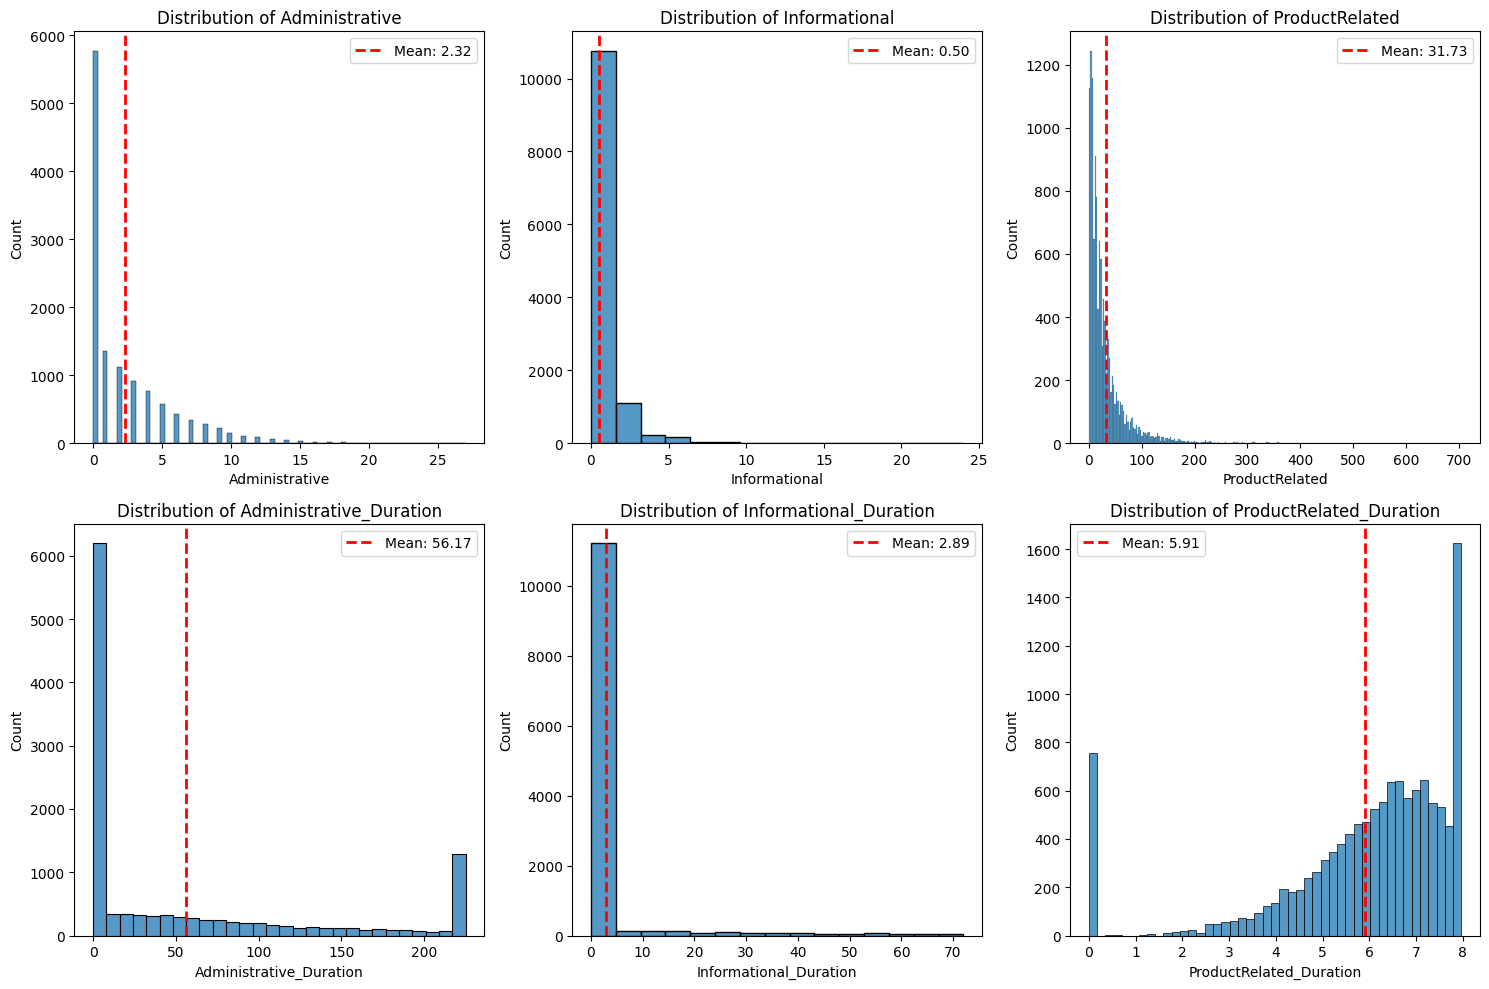

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your desired variables for visualization
page_columns = ['Administrative', 'Informational', 'ProductRelated']
duration_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
visualization_columns = page_columns + duration_columns

# Ensure the columns exist in the transformed DataFrame
visualization_columns = [col for col in visualization_columns if col in transformed.columns]

# Determine the subplot layout
ncols = 3
nrows = int(np.ceil(len(visualization_columns) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten() if (nrows * ncols) > 1 else [axes]

for i, col in enumerate(visualization_columns):
    # Plot a histogram for each column
    sns.histplot(data=transformed, x=col, ax=axes[i], kde=False)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Calculate mean and add a vertical line
    mean_val = transformed[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Interpretation**           
The administrative page suggests infrequent engagement from users, similar to the duration on the page with low interaction but occasional longer sessions (mean=56.17). The informational page seems barely used with very low duration except for a few instances (mean=2.89). The product related page is much more often visited by users (mean=31.73) with higher engagement of users as well (mean=5.91).

# 2.3 Diagnose for correlations between variables and determine independent and dependent variables

Provide measures of centrality and distribution with visualizations
Explore the relationships between features using visualizations like pair plots and correlation matrices.
Examine the distribution of the dependent variable (Revenue) and its relationship with independent variables.

Here we describe and explore correlations between the variables and determine independent and dependent variables.

/tmp/ipython-input-4019411473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transformed, x='Revenue', palette='Set2')


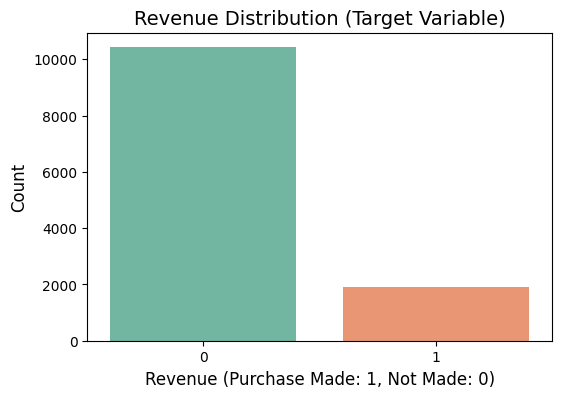

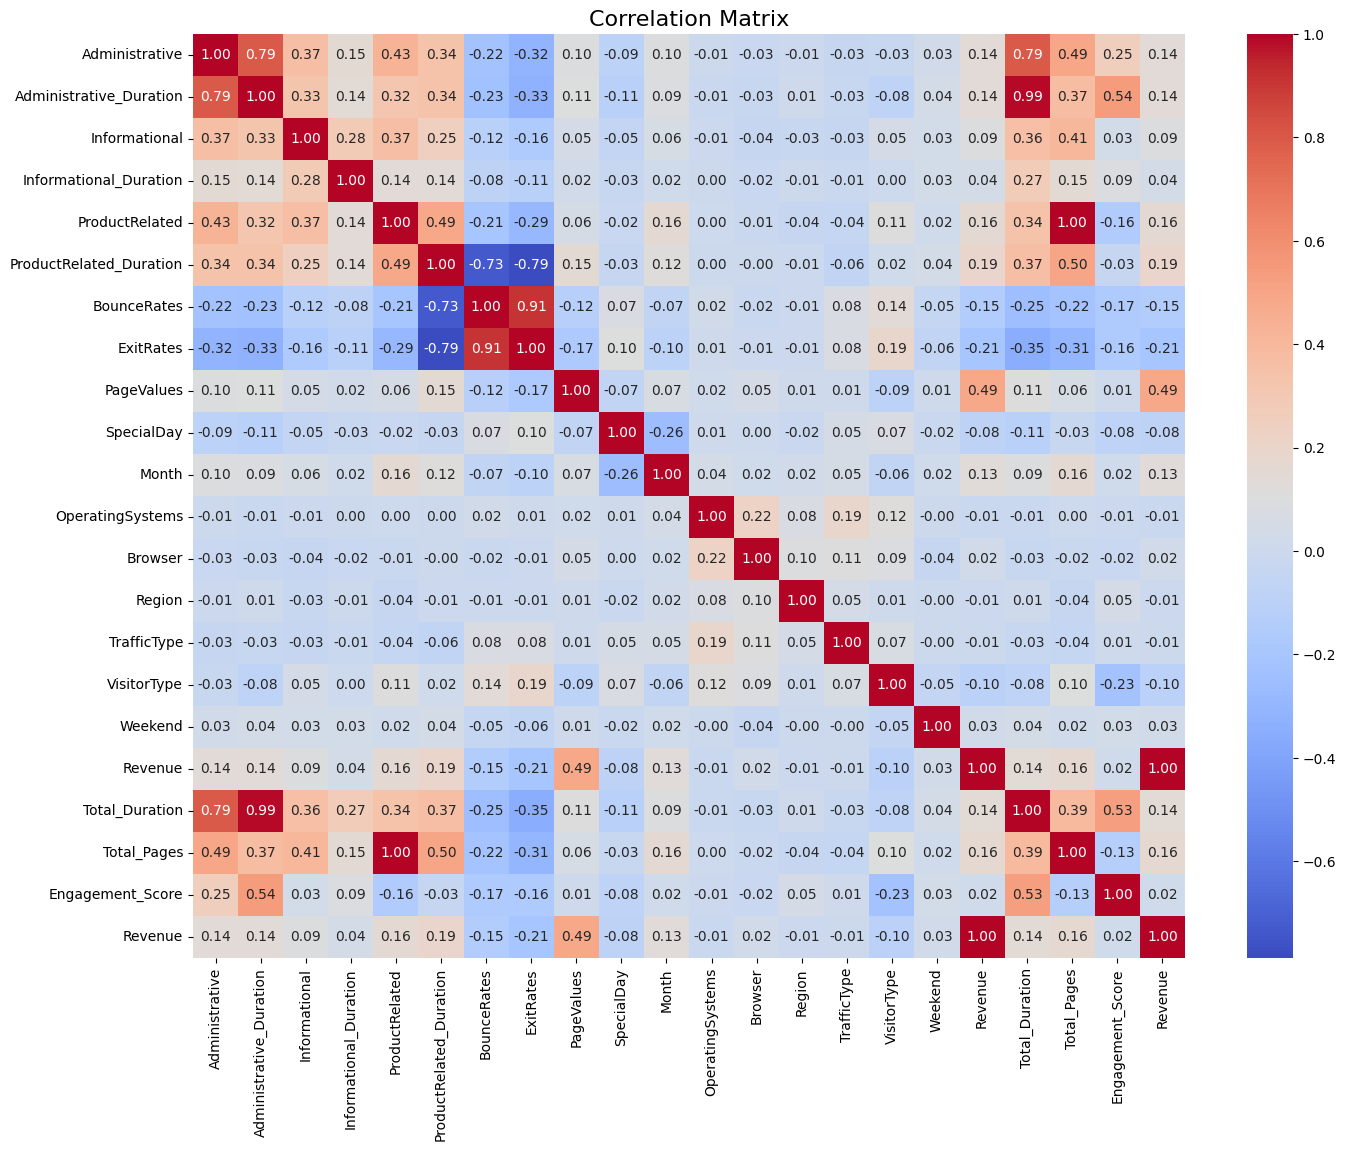

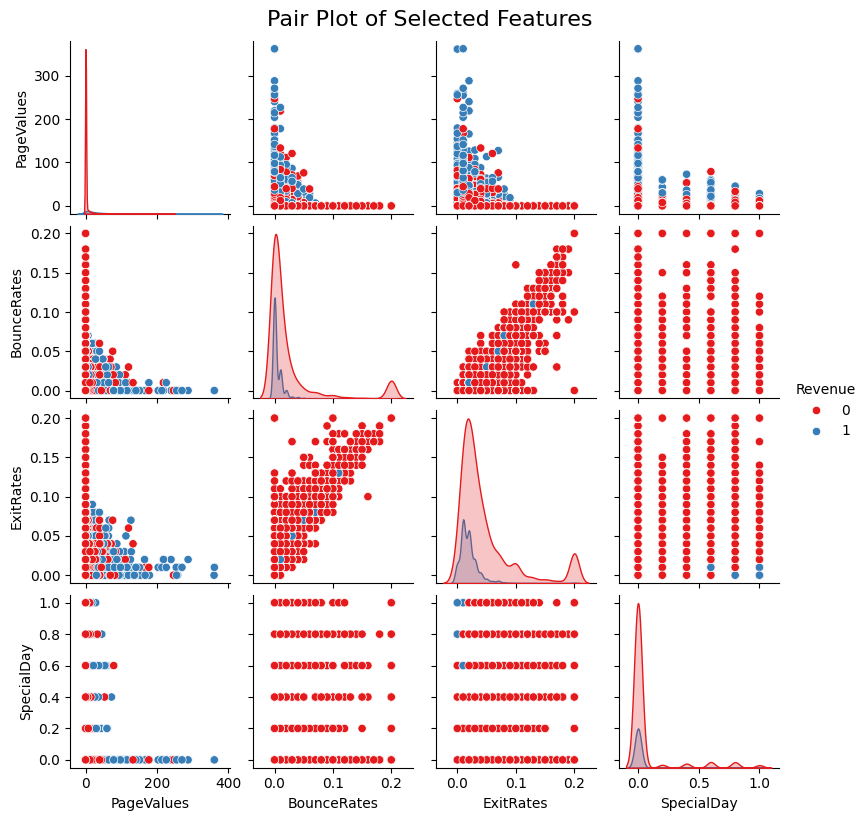

In [9]:
# Plot distribution of the target variable 'Revenue'
plt.figure(figsize=(6, 4))
sns.countplot(data=transformed, x='Revenue', palette='Set2')
plt.title('Revenue Distribution (Target Variable)', fontsize=14)
plt.xlabel('Revenue (Purchase Made: 1, Not Made: 0)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Correlation matrix for numeric features
numeric_cols = transformed.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(16, 12))
corr_matrix = transformed[numeric_cols + ['Revenue']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Pair plot for selected features to visualize relationships
selected_features = ['PageValues', 'BounceRates', 'ExitRates', 'SpecialDay', 'Revenue']
sns.pairplot(transformed[selected_features], hue='Revenue', palette='Set1', diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Selected Features', fontsize=16, y=1.02)
plt.show()

**Interpretation:**       
Administrative is strongly positively and linearly related to Administrative_Duration with a correlation coefficient of 0.79.
Bounce Rate and Exit Rate is strongly negatively and linearly related to ProductRelated_Duration with correlation coefficients of -0.73 and -0.79.
Exit Rate is strongly positively and linearly related to Bounce Rate with a correlation coefficient of 0.91.
From the pair plot, Revenue is true mostly at lower ExitRates with moderately positive relationship with Page Values.

# 2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

In this section, we will utilize Python’s matplotlib.pyplot, seaborn, library to create visualizations to discover patterns and identify features of interest.

**Visualization of seasonal sales pattern**
Purpose: Our goal is to identify the seasonal sales patterns throughout the year. To achieve this, we utilized a stacked bar chart to visualize the total  proportion of transactions (Revenue = True), categorized by months and grouped into their respective seasons.

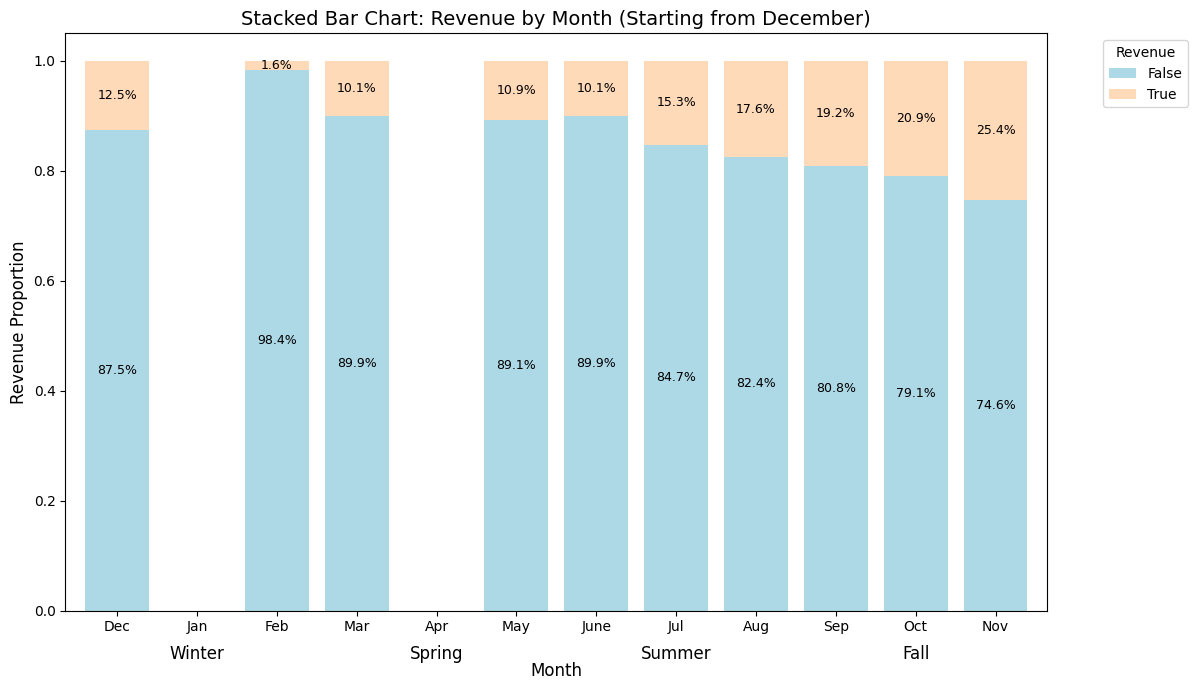

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define month and season mapping
month_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov']  # Start from Dec
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 'Apr': 'Spring',
    'May': 'Spring', 'June': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'
}

cleaned_df['Season'] = cleaned_df['Month'].map(season_mapping) # Load the cleaned dataset （cleaned_df）

# Create crosstab for Revenue proportions by Month
crosstab = pd.crosstab(cleaned_df['Month'], cleaned_df['Revenue'], normalize='index').reindex(month_order)

# Plot the stacked bar chart
colors = ['#ADD8E6', '#FFDAB9']  # Light blue and light orange
fig, ax = plt.subplots(figsize=(12, 7))
crosstab.plot(kind='bar', stacked=True, color=colors, width=0.8, ax=ax)

# Add percentage labels inside the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    # Display percentage only if height > 0
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f"{height * 100:.1f}%",
                ha='center', va='center', fontsize=9, color='black')

# Set X-axis with month labels
ax.set_xticklabels(month_order, rotation=0)
plt.xlabel('Month', fontsize=12, labelpad=20)

# Add secondary labels for seasons
season_ticks = ['Winter'] * 3 + ['Spring'] * 3 + ['Summer'] * 3 + ['Fall'] * 3
season_positions = np.arange(len(month_order))  # X positions for the months

for i, label in enumerate(season_ticks):
    if i == 0 or season_ticks[i] != season_ticks[i - 1]:  # Only display at the start of each season
        ax.text(i + 1, -0.08, label, ha='center', va='center', fontsize=12, color='black', transform=ax.transData)

# Adjust legend
plt.legend(title='Revenue', labels=['False', 'True'], loc='upper right', bbox_to_anchor=(1.15, 1))

# Add title and layout adjustments
plt.title('Stacked Bar Chart: Revenue by Month (Starting from December)', fontsize=14)
plt.ylabel('Revenue Proportion', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

**Interpretation:**     
The seasonal revenue pattern shows the proportion of sessions generating revenue across months, starting from December. As we can see, November stands out with the highest percentage of revenue-generating sessions (25.4%), likely influenced by major shopping events like Black Friday. The summer months (June through August) show a gradual increase in the proportion of revenue sessions, peaking in July (15.3%) and declining slightly afterward. Winter months (December through February) exhibit varying revenue proportions, with December performing well (12.5%) while January and February show significantly lower proportions. The spring months (March through May) maintain relatively stable performance, with revenue proportions around 10%. These insights highlight the seasonal nature of e-commerce sales, suggesting an opportunity to capitalize on high-revenue months such as November and focus on strategies to boost engagement during the lower-performing months like February and March.
We detected an imbalance between Revenue=False and Revenue=True across the year, which could influence the performance of future modeling efforts. We can discover further in the next steps.

# Grouped Bar Chart -Visitor Type by Revenue Pattern

The purpose of this visualization is to explore the relationship between visitor types (Returning Visitor, New Visitor, Other) and transaction outcomes (Revenue=True or Revenue=False). By examining the distribution of revenue across different visitor types, we aim to identify patterns and insights that could inform strategies for increasing conversions.

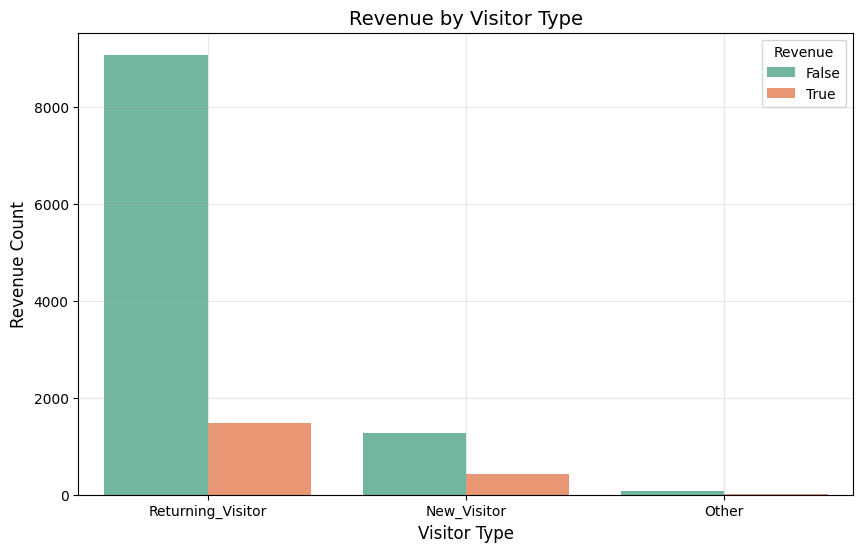

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for countplot

# Load the cleaned dataset （cleaned_df）
# Create a bar plot for VisitorType and Revenue
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df, x='VisitorType', hue='Revenue', palette='Set2')

# Customize the plot
plt.title('Revenue by Visitor Type', fontsize=14)
plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Revenue Count', fontsize=12)
plt.legend(title='Revenue', loc='upper right')
plt.grid(alpha=0.3)
plt.show()

**Interpretation:**.  
As we can see, the majority of sessions are dominated by Returning Visitors, who also contribute the largest number of transactions (Revenue=True). However, most sessions in this group still result in Revenue=False, reflecting room for improvement in conversion rates. New Visitors, while representing a smaller proportion of sessions, show relatively low conversion rates compared to Returning Visitors, suggesting opportunities for targeted strategies to engage and convert this group more effectively. The “Other” visitor type has minimal representation and contributes almost no transactions, indicating it has relatively least impact on revenue generation. Overall, the chart emphasizes the critical role of Returning Visitors in driving revenue, while also pointing to potential gains from focusing on New Visitor engagement and conversion strategies.
This chart emphasizes the importance of focusing on Returning Visitors as the primary revenue source while addressing the challenges of engaging and converting New Visitors.

# Visualization for Regional Sales Patterns

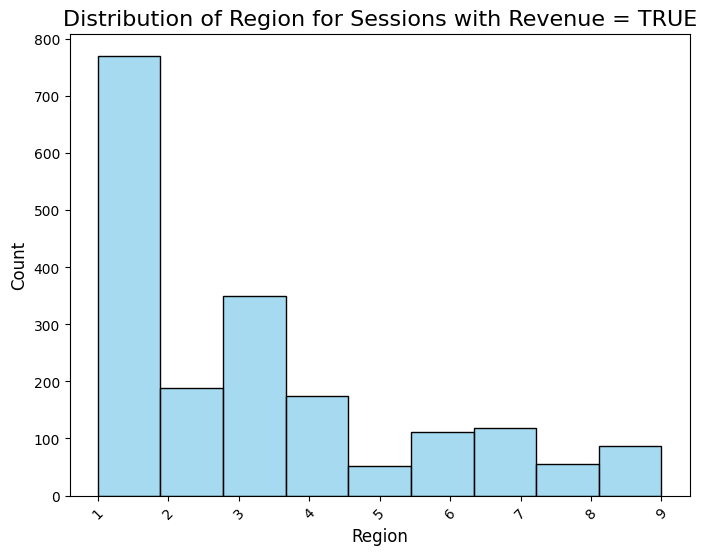

In [12]:
# Filter data for sessions with Revenue = TRUE
revenue_true_data = transformed[cleaned_df['Revenue'] == True]

# Draw the histogram for the Region column for sessions with Revenue = TRUE
plt.figure(figsize=(8, 6))
sns.histplot(data=revenue_true_data, x='Region', bins=len(transformed['Region'].unique()), kde=False, color='skyblue')
plt.title('Distribution of Region for Sessions with Revenue = TRUE', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Interpretation:**.  
The regional sales data indicates a clear dominance of Region 1, which accounts for the highest number of sessions resulting in revenue, suggesting it is the primary market for the e-commerce platform. Regions 2, 3, and 4 show moderate levels of sales activity, potentially representing secondary markets. In contrast, Regions 5 through 9 contribute significantly less to revenue-generating sessions, indicating these regions might have lower market penetration or engagement. These insights suggest focusing on maintaining dominance in Region 1 while exploring strategies to boost engagement and sales in underperforming regions.

# Visualization for Traffic Type Sales Patterns

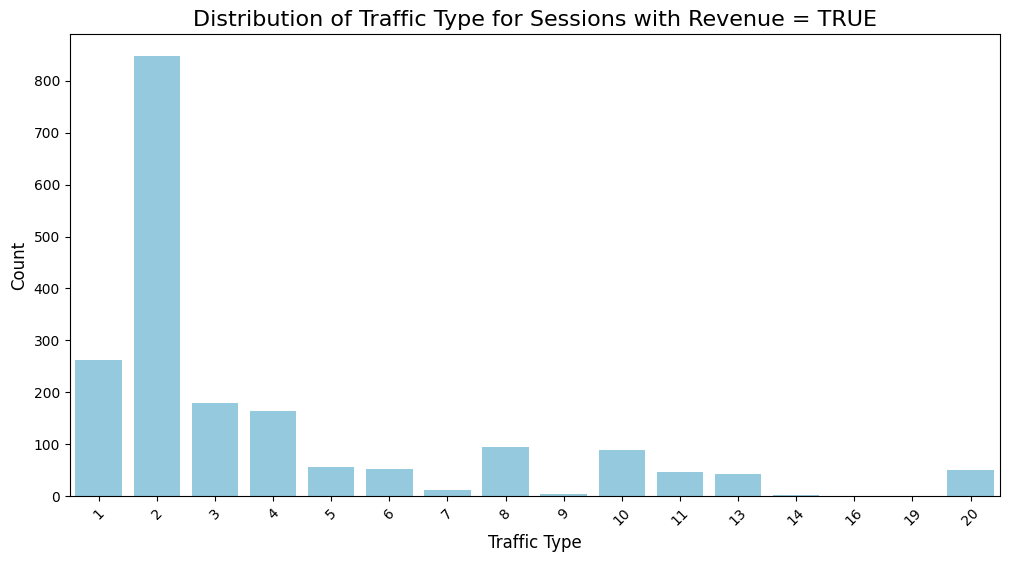

In [13]:
# Calculate counts for each TrafficType where Revenue = TRUE
traffic_type_counts = revenue_true_data['TrafficType'].value_counts().sort_index()

# Create the bar plot with uniform color
plt.figure(figsize=(12, 6))
sns.barplot(
    x=traffic_type_counts.index,
    y=traffic_type_counts.values,
    color='skyblue'  # Set a uniform color
)
plt.title('Distribution of Traffic Type for Sessions with Revenue = TRUE', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Interpretation:**     
The sales data by traffic type reveals that Traffic Type 2 dominates revenue-generating sessions, significantly outpacing all other traffic types. Traffic Types 1, 3, and 4 contribute moderately to the total sales, while the remaining traffic types have minimal impact, with a sharp drop-off in counts. This suggests that Traffic Type 2 is the primary driver of sales, likely associated with a highly effective marketing or referral channel. The e-commerce platform should focus on maintaining and enhancing Traffic Type 2 while exploring opportunities to optimize and increase the conversion rates of underperforming traffic types.

# Visualization for SpecialDays, Engagement_Category, and Total_Pages with Revenue

**Interpretation:**  
The analysis reveals that proximity of online shopping sessions to a special day does not seem correlated to average revenue - sessions more likely to be finalized with a transaction are for the most part not related to SpecialDays in the year. For engagement category it seems that online sessions with higher engagement lead to a higher probability of average revenue compared with users grouped in the low engagement category. The total pages assumes the sum of page duration from administrative, informational, and productrelated variables, and for the most part its expected that as users' online sessions include longer overall duration there's a higher likelihood of finalizing a transaction on the website with the company. Please note that the trend is a bit nuanced as it includes all pages duration and not all pages are likely to lead to a transaction.

/tmp/ipython-input-4018866500.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4018866500.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


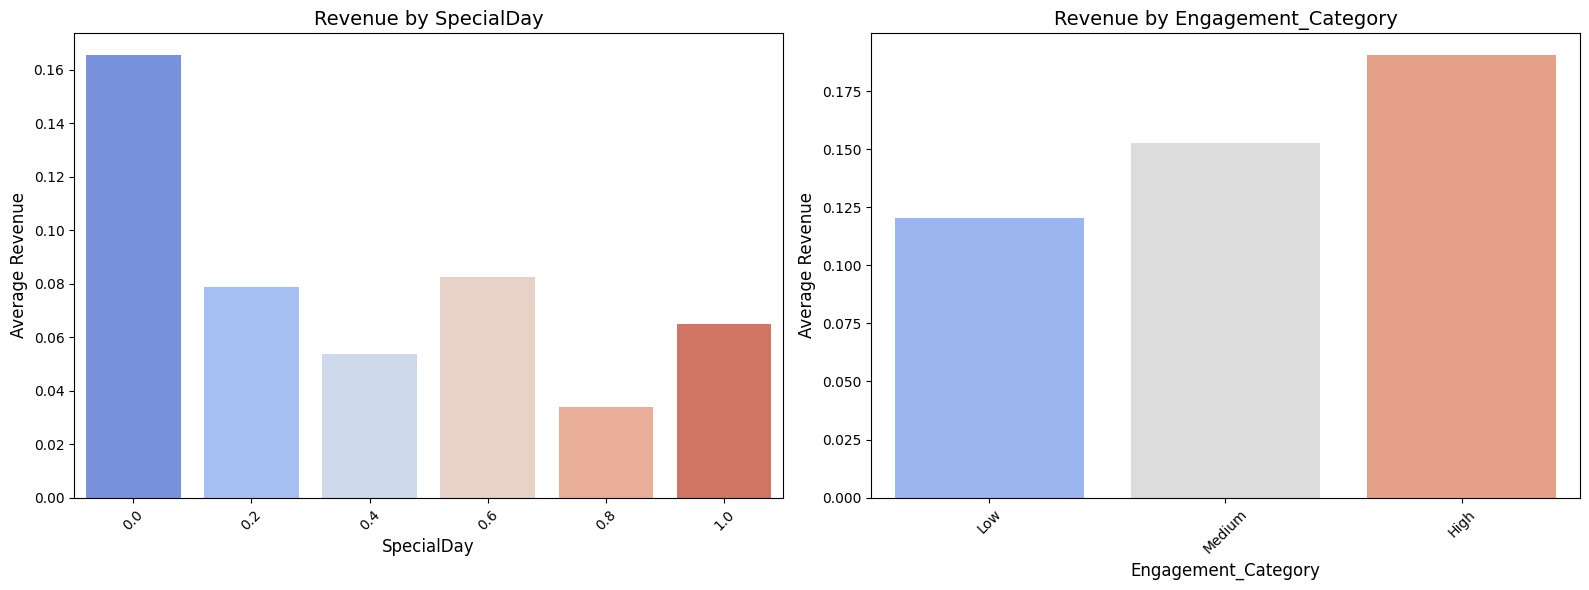

/tmp/ipython-input-4018866500.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = transformed.groupby(bins)['Revenue'].mean().reset_index()
/tmp/ipython-input-4018866500.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


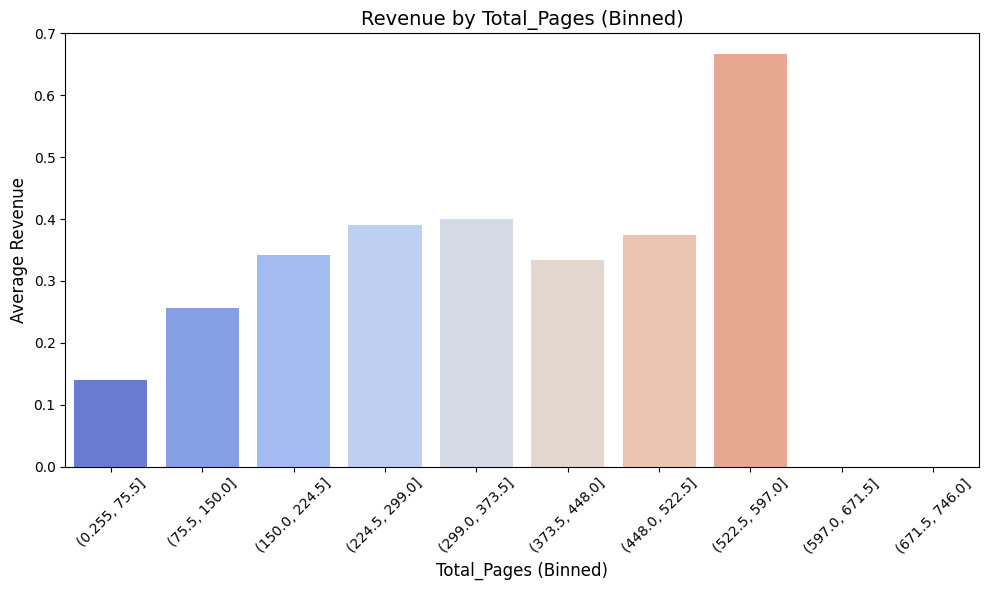

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables to visualize
selected_vars = ['SpecialDay', 'Engagement_Category']
numeric_var = 'Total_Pages'

# Create barplots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust grid for 2 categorical variables
axes = axes.flatten()

for i, var in enumerate(selected_vars):
    if var in transformed.columns:
        sns.barplot(
            x=var,
            y='Revenue',
            data=transformed,
            ax=axes[i],
            errorbar=None,  # Replace 'ci' with 'errorbar' to remove warnings
            palette='coolwarm',
            hue=None  # Explicitly set hue to None
        )
        axes[i].set_title(f"Revenue by {var}", fontsize=14)
        axes[i].set_xlabel(var, fontsize=12)
        axes[i].set_ylabel("Average Revenue", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()

# Create a binned barplot for Total_Pages
if numeric_var in transformed.columns:
    # Bin the Total_Pages variable
    bins = pd.cut(transformed[numeric_var], bins=10)  # 10 bins
    binned_data = transformed.groupby(bins)['Revenue'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=binned_data[numeric_var].astype(str),  # Convert bins to strings for the x-axis
        y=binned_data['Revenue'],
        palette='coolwarm',
        hue=None  # Explicitly set hue to None
    )
    plt.title("Revenue by Total_Pages (Binned)", fontsize=14)
    plt.xlabel("Total_Pages (Binned)", fontsize=12)
    plt.ylabel("Average Revenue", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Section 3: Data Analytics

# 3.1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables

**Random Forest**

**Interpretation:**    
This code is about using a Random Forest model to figure out which factors are most important for predicting whether a customer generates revenue. First, it splits the dataset into features (the predictors) and the target variable (revenue), ensuring categorical variables are converted into a format the model can understand. It then divides the data into training and testing sets, using the training set to teach the model and the testing set to evaluate its performance. Cross-validation is included to ensure the model's performance is consistent across different splits of the data. After training, the model evaluates its ability to predict revenue based on the features, providing metrics like precision, recall, and an AUC score (a measure of prediction quality). Importantly, the Random Forest highlights the most influential variables, which are visualized in a bar chart. These top features can then be used in a Logistic Regression model, which is better suited for interpreting how each variable impacts revenue.


Random Forest Cross-Validation AUC Scores: [0.92564678 0.92204655 0.9146817  0.93258684 0.91107628]
Mean AUC: 0.92 ± 0.01

=== Random Forest Results ===
Test AUC: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.73      0.57      0.64       572

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.90      0.90      3699


Random Forest Feature Importances:
                    Feature  Importance
8                PageValues    0.372096
18              Total_Pages    0.059110
17           Total_Duration    0.059104
5   ProductRelated_Duration    0.058278
4            ProductRelated    0.057685
19         Engagement_Score    0.054380
7                 ExitRates    0.043744
1   Administrative_Duration    0.037388
0            Administrative    0.034605
10                    Month    0.033436


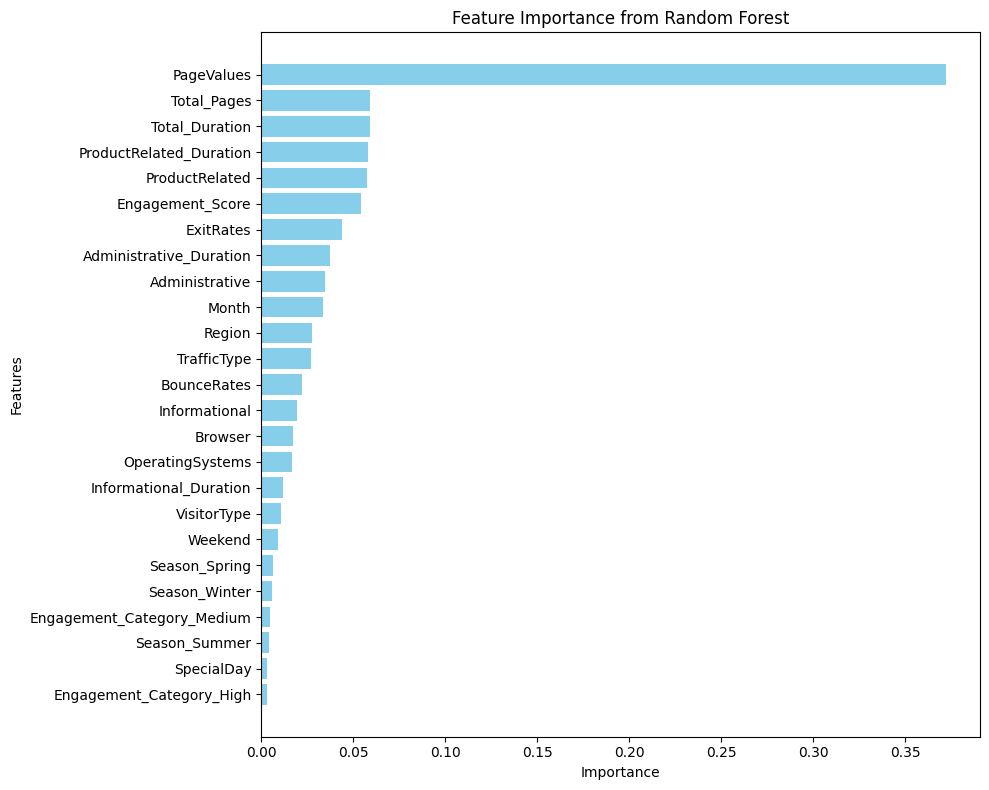

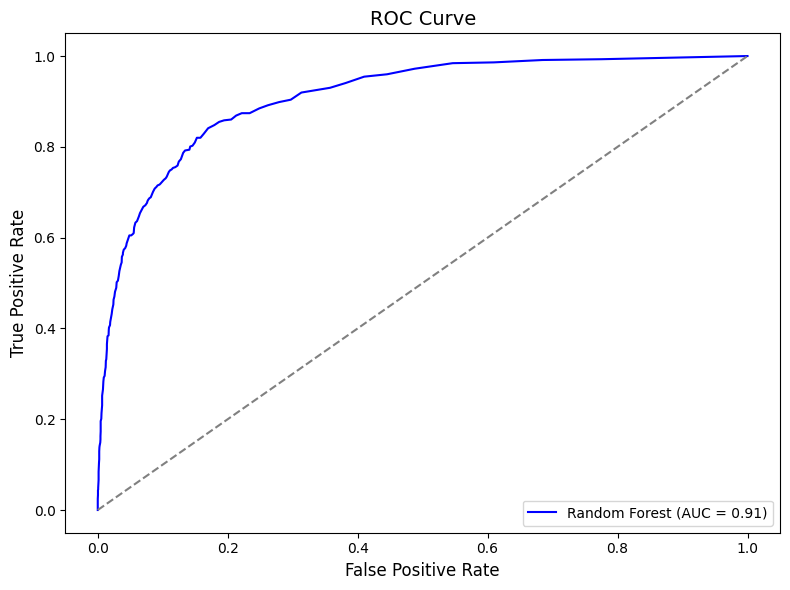


=== Random Forest Model Summary ===
Cross-Validation Mean AUC: 0.92
Test Set AUC: 0.91


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the feature matrix and target variable
X = pd.get_dummies(transformed.drop(columns=['Revenue']), drop_first=True)  # Drop target variable and encode categorical features
y = transformed['Revenue']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ===== Random Forest with Cross-Validation =====
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Perform 5-fold cross-validation on Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"\nRandom Forest Cross-Validation AUC Scores: {rf_cv_scores}")
print(f"Mean AUC: {np.mean(rf_cv_scores):.2f} ± {np.std(rf_cv_scores):.2f}")

# Train on the full training set
rf_model.fit(X_train, y_train)

# Evaluate on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_proba = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_proba)

print("\n=== Random Forest Results ===")
print(f"Test AUC: {rf_auc:.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

# ===== Feature Importance Analysis =====
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("\nRandom Forest Feature Importances:")
print(feature_importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ===== Visualize ROC Curve =====
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_proba)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ===== Summary =====
print("\n=== Random Forest Model Summary ===")
print(f"Cross-Validation Mean AUC: {np.mean(rf_cv_scores):.2f}")
print(f"Test Set AUC: {rf_auc:.2f}")

**Logistic Regression**

Intercept (β₀): -4.784123369134627
Coefficients (β₁, β₂, ...):
                   Feature  Coefficient
3  ProductRelated_Duration     0.243603
9                    Month     0.090926
0               PageValues     0.083667
5         Engagement_Score     0.022068
1              Total_Pages     0.009447
7  Administrative_Duration     0.000583
2           Total_Duration    -0.000725
4           ProductRelated    -0.005572
8           Administrative    -0.009598
6                ExitRates    -3.681627

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3127
           1       0.71      0.32      0.45       572

    accuracy                           0.88      3699
   macro avg       0.80      0.65      0.69      3699
weighted avg       0.86      0.88      0.85      3699

Confusion Matrix:
[[3053   74]
 [ 387  185]]


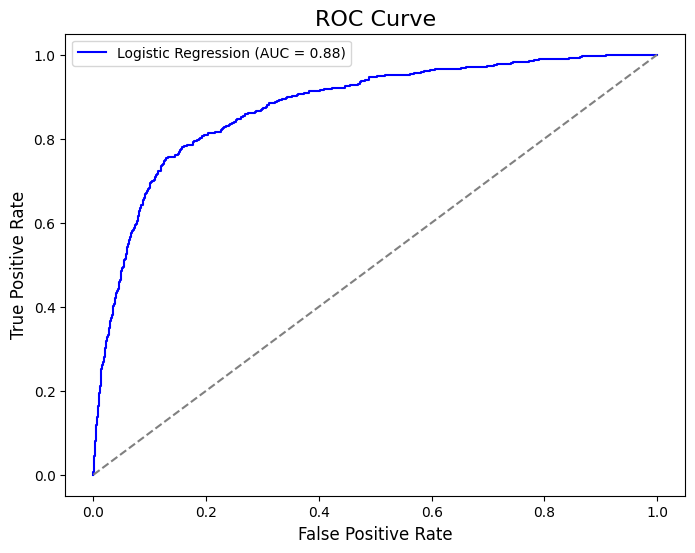

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Specify the most important variables from the Random Forest analysis
selected_features = ['PageValues', 'Total_Pages', 'Total_Duration', 'ProductRelated_Duration',
                     'ProductRelated', 'Engagement_Score', 'ExitRates', 'Administrative_Duration',
                     'Administrative', 'Month']
X = transformed[selected_features]  # Select only the chosen features
y = transformed['Revenue']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Extract the coefficients and intercept
coefficients = log_reg.coef_[0]  # Coefficients for each feature
intercept = log_reg.intercept_[0]  # Intercept

# Pair feature names with coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display intercept and coefficients
print(f"Intercept (β₀): {intercept}")
print("Coefficients (β₁, β₂, ...):")
print(feature_coefficients)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()

                Predicted Class
                0 (Negative)    1 (Positive)
Actual Class
0 (Negative)    3053            74
1 (Positive)    387             185

**Interpretation:**  
The classification report indicates an overall accuracy of 88%, meaning 88% of predictions (revenue or no revenue) were correct. The model was much stronger for predicting instances where revenue did not occur (89%) vs occurrence of revenue (71%). In addition, the model mostly avoided false positives for non-revenue instances (98% recall) while it struggled to capture true positives (32% recall). For instance, out of 3,699 total observations, the model correctly predicted 3,053 non-revenue cases (true negatives) and 185 revenue cases (true positives). However, it also falsely classified 74 non-revenue cases as revenue (false positives, type I error) and 387 revenue cases as non-revenue (false negatives, type II error). In summary, this indicates areas for improvement, like tuning the model or exploring additional features/models (e.g., Gradient Boosting)

# Conclusion

Now we can answer the questions we set out at the beginning of the project.

1. Is there a direct relationship between revenue and:                                                                                                                                                                                                    - Month - No, weak positive correlation (0.13)
- VisitorType - No, weak negative correlation (-0.10)                                                                                                                                                                                                                               - Region - No, weak negative correlation (-0.01)    
- TrafficType - No, weak negative correlation (-0.01)                                                                                                                                                                                                                                                                                                                                                                                                                                                                      - SpecialDay - No, weak negative correlation (-0.08)                                                                                                                                                                                                                        - Page Type:
- Administrative (no, weak positive correlation (0.14))
- Informational (no, weak positive correlation (0.09))
- ProductRelated (weak positive correlation (0.16))

**Other:** PageValues seems to be medium strong positive correlated to revenue (0.49) while exit (-0.21) and bounce (-0.15) rates are negatively correlated.

2. What actions should the company consider to increase revenue based on those findings?    

The company could focus on creating new features (such as sales interaction with chatbot, customer segmentation, customer tiers, discount usage), collecting more data, optimizing sales to different regions and VisitorTypes, and consider other elements that can drive traffic and transactions such as marketing or advertising campaigns, branding, events, webinars, etc. Ultimately, more data is required about the business in order to make more accurate recommendations.